In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_columns', 500)

In [49]:
#This is with data from the Libraries.io website
#very much hacked together but just to see if it works ;)

path ="/home/rick/UH-Spring-2019/Project/codescoop-models/Libraries_io_data/"


dependencies =          path + "Libraries.io-open-data-1.0.1/dependencies-1.0.0-2017-06-15.csv"
projects =              path + "Libraries.io-open-data-1.0.1/projects-1.0.0-2017-06-15.csv"
projects_w_repository = path + "Libraries.io-open-data-1.0.1/projects_with_repository_fields-1.0.0-2017-06-15.csv"
repos =                 path + "repositories-1.2.0-2018-03-12.csv"
repos_depend =          path + "repository_dependencies-1.2.0-2018-03-12.csv"
tags =                  path + "Libraries.io-open-data-1.0.1/tags-1.0.0-2017-06-15.csv"

In [93]:
data = pd.read_csv(repos, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38] 
                   ,nrows=1000)
data.tail()

,Host Type,Name with Owner,Description,Fork,Created Timestamp,Updated Timestamp,Last pushed Timestamp,Homepage URL,Size,Stars Count,Language,Issues enabled,Wiki enabled,Pages enabled,Forks Count,Mirror URL,Open Issues Count,Default branch,Watchers Count,UUID,Fork Source Name with Owner,License,Contributors Count,Readme filename,Changelog filename,Contributing guidelines filename,License filename,Code of Conduct filename,Security Threat Model filename,Security Audit filename,Status,Last Synced Timestamp,SourceRank,Display Name,SCM type,Pull requests enabled,Logo URL,Keywords
1079,GitHub,vanderlee/coverflow,Yet another jQuery Coverflow widget. Support f...,False,2013-06-05 13:41:39 UTC,2017-01-24 15:49:37 UTC,2017-01-24 15:44:21 UTC,http://vanderlee.github.io/coverflow/,316,83,HTML,True,True,True,34,NaN,7,master,12,10503348,NaN,NaN,3,README.md,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-27 15:52:01 UTC,7,GitHub,NaN,NaN,NaN,NaN
1080,GitHub,AntonTrollback/cover,jQuery plugin for sizing elements just like `b...,False,2014-03-22 22:52:45 UTC,2017-02-23 12:49:59 UTC,2014-12-19 19:32:51 UTC,http://antontrollback.github.io/cover/demo/,3471,40,JavaScript,True,True,True,7,NaN,0,master,4,18021686,NaN,NaN,1,README.md,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-23 12:49:59 UTC,5,GitHub,NaN,NaN,NaN,NaN
1081,GitHub,nicmart/CoversCarousel,"A death simple, mobile friendly, covers carous...",False,2013-11-07 12:13:51 UTC,2013-11-08 15:47:48 UTC,2013-11-08 15:47:47 UTC,NaN,176,2,JavaScript,True,True,False,0,NaN,0,master,2,14202820,NaN,NaN,1,README.md,NaN,CONTRIBUTING.md,NaN,NaN,NaN,NaN,NaN,2016-04-29 21:47:37 UTC,1,GitHub,NaN,NaN,NaN,NaN
1082,GitHub,Geodan/cow,Concurrent Online Workspace,False,2013-04-05 09:00:48 UTC,2017-09-21 14:11:05 UTC,2016-12-09 20:10:21 UTC,NaN,15673,7,JavaScript,True,True,False,7,NaN,12,master,15,9237523,NaN,MIT,6,README.md,NaN,NaN,LICENSE,NaN,NaN,NaN,NaN,2016-05-27 16:35:35 UTC,6,GitHub,NaN,NaN,NaN,NaN
1083,GitHub,stefanerickson/covervid,Make your HTML5 video behave like a background...,False,2014-05-02 18:22:30 UTC,2018-02-14 04:16:41 UTC,2017-10-17 22:53:33 UTC,http://stefanerickson.github.io/covervid/,123356,1034,JavaScript,True,True,True,187,NaN,16,gh-pages,33,19384244,NaN,MIT,5,README.md,NaN,NaN,LICENSE,NaN,NaN,NaN,NaN,2016-05-27 13:54:57 UTC,9,GitHub,NaN,git,NaN,NaN


In [122]:
def gnumeric_func (data, columns):
    data[columns] = data[columns].apply(lambda x: pd.factorize(x)[0])
    return data

In [133]:
droplist = ['Description', 'Name with Owner', 'Created Timestamp', "Updated Timestamp", 'Last pushed Timestamp', 'Homepage URL', 'Mirror URL', 'UUID', 'Last Synced Timestamp','Fork Source Name with Owner', 'Changelog filename', 'Contributing guidelines filename', 'License filename','Code of Conduct filename', 'Security Threat Model filename', 'Security Audit filename', 'SCM type', 'Logo URL', 'Keywords', 'Stars Count' ]
factorizelist = ['Host Type', 'Fork', 'Language', 'Issues enabled', 'Wiki enabled', 'Pages enabled', 'License', 'Readme filename', 'Default branch', 'Status', 'Display Name', 'Pull requests enabled'] 
datax = data.drop(droplist, axis=1 )

datax = gnumeric_func(datax, factorizelist)
datax

,Host Type,Fork,Size,Language,Issues enabled,Wiki enabled,Pages enabled,Forks Count,Open Issues Count,Default branch,Watchers Count,License,Contributors Count,Readme filename,Status,SourceRank,Display Name,Pull requests enabled
1,0,0,512,0,0,0,0,0,1,0,2,0,1,0,-1,5,0,-1
2,0,0,924,0,0,0,1,782,85,0,61,0,21,0,-1,8,0,0
3,0,1,472,0,1,0,1,0,0,0,1,-1,5,0,-1,2,0,-1
4,0,0,536,0,0,0,0,1,2,0,1,-1,1,0,-1,3,0,-1
5,0,0,192,1,0,0,1,0,0,0,2,0,1,0,-1,4,0,-1
6,0,0,285,1,0,0,1,3,3,0,4,0,1,0,-1,4,0,0
7,0,0,771,0,0,1,0,0,0,0,13,0,1,0,-1,2,0,0
8,0,0,108,0,1,1,1,0,0,0,1,-1,0,-1,-1,2,0,-1
9,0,0,907,0,0,0,1,495,15,0,184,0,74,0,-1,15,0,0
10,0,0,120,0,0,0,1,0,0,0,2,-1,1,-1,-1,2,0,0


alpha =  0.0001
Training score: 0.9061238844295263
Test score:  0.915963535132533
Number of features used:  16
 
alpha =  0.001
Training score: 0.9061238843048668
Test score:  0.9159670524626464
Number of features used:  16
 
alpha =  0.01
Training score: 0.9061238718388254
Test score:  0.9160021569310677
Number of features used:  16
 
alpha =  0.05
Training score: 0.9061235696312637
Test score:  0.9161567079072848
Number of features used:  16
 
alpha =  0.1
Training score: 0.9061226252326854
Test score:  0.9163465251002254
Number of features used:  16
 
alpha =  1
Training score: 0.9060016823354375
Test score:  0.9191076823993904
Number of features used:  15
 
alpha =  5
Training score: 0.905516720281804
Test score:  0.9241957563546962
Number of features used:  11
 
alpha =  10
Training score: 0.904987934440968
Test score:  0.9264148889294839
Number of features used:  11
 
Optimal alpha =  10


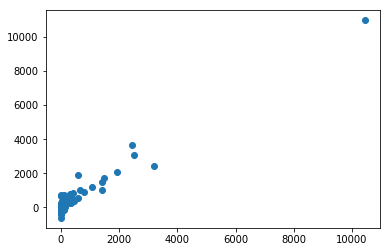

Mean squared error:  41499.75266891678
Model R² score:  0.9264148889294839


In [134]:
# This code demonstrates how to use lasso regression for choosing optimal variables
# for a linear model.

# x should be a dataframe containing the explanatory variables (forks, language, etc)
x = datax

# y should be a vector containing the target variable (number of stars)
y = list(data["Stars Count"])

# split the data in to train and test part
X_train, X_test, y_train, y_test = train_test_split(x, y)


## trying different alphas and choosing the optimal model

# if fitting of the model is really slow, you can drop last values of alpha to make it faster
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 1, 5, 10]
n = len(alphas)
test_scores = np.zeros(n)

for i in range(0,n):
    a = alphas[i]
    print("alpha = ", a)
    lasso = Lasso(alpha = a, max_iter = 10e5)
    lasso.fit(X_train, y_train)
    train_score=lasso.score(X_train,y_train)
    test_score=lasso.score(X_test,y_test)
    test_scores[i] = test_score
    coeff_used = np.sum(lasso.coef_!=0)
    print("Training score:", train_score)
    print("Test score: ", test_score)
    print("Number of features used: ", coeff_used)
    print(" ")

# pick the alpha value with best score
best_alpha = alphas[np.argmax(test_scores)]
print("Optimal alpha = ", best_alpha)
lasso = Lasso(alpha = best_alpha, max_iter = 10e5)
lasso.fit(X_train, y_train)


# model summary
predicted = lasso.predict(X_test)
expected = y_test
# expected vs predicted values
plt.scatter(expected, predicted)
plt.show()
print("Mean squared error: ", mean_squared_error(expected, predicted))
print("Model R² score: ", r2_score(expected, predicted))